## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
#import torch
#import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [5]:
PATH = './glove.6B.50d.txt'
emb_dim = 50

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    emb_dict = {}                                   # Create empty dictionary
    with open(path, 'r') as f:                      # Open txt file
        for line in f:
            values = line.split()                   # Split line into values
            word = values[0]    
            vector = np.asarray(values[1:], dtype='float32')        # Create vector of values
            emb_dict[word] = vector                                 # Add word and vector to dictionary
    return emb_dict 

In [6]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

Check the number of words in the dictionary:

In [12]:
print(f'Dictionary length: {len(embeddings_dict)}')

Dictionary length: 400000


In [20]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_50D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [18]:
# Show some word vectors
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [19]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [35]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func):
    emb_matrix = np.zeros((len(words2show), emb_dim))    # Create empty embeddings matrix
    for i, word in enumerate(words2show):
        emb_matrix[i] = embeddings_dict[word]            # Add word vector to matrix row

    # Apply PCA if specified
    if func == PCA:
        emb_pca = func(n_components=2)              # Create PCA object with 2 components
        emb_pca.fit(emb_matrix)                     # Fit PCA object to matrix
        emb_pca = emb_pca.transform(emb_matrix)     # Transform matrix  
    # Apply t-SNE if specified
    elif func == TSNE:
        emb_pca = func(n_components=2, perplexity=30, learning_rate='auto')     # Create t-SNE object with 2 components
        emb_pca = emb_pca.fit_transform(emb_matrix)                             # Fit and transform matrix

    # Plot the embeddings
    plt.figure(figsize=(12,10))
    plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c='r')
    for i, word in enumerate(words2show):
        plt.annotate(word, xy=(emb_pca[i, 0], emb_pca[i, 1]))
    plt.show()


Words to plot:

In [32]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


#### PCA visualization

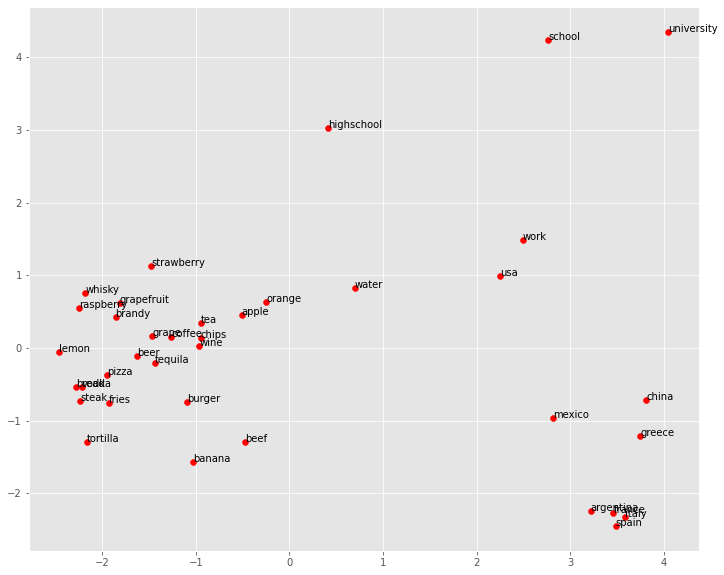

In [33]:
# PCA dimensionality reduction plot
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

#### t-SNE visualization

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


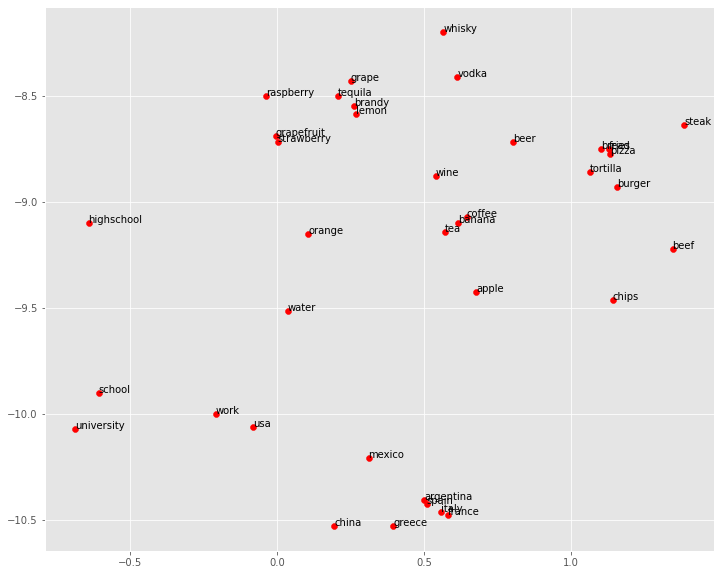

In [36]:
# t-SNE dimensionality reduction plot
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

### Analogy function


1. We will first compute the vector representation of the analogy by using the following formula:

`word_analogy = word2 - word1 + word3`

2. Then, we will find the most similar word to the vector, by using the cosine similarity given by the following formula:

`Similarity = (A.B) / (||A||.||B||)`

* A.B is dot product of A and B
* ||A|| is the norm of A

3. Finally, we will return the most similar word to the vector.

In [43]:
def analogy(word1, word2, word3, embeddings_dict):
    # Calculate word analogy
    word_analogy = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3] 
    similarity = 0
    for word in embeddings_dict.keys():         # Iterate over all words in dictionary
        if word in [word1, word2, word3]:       # Skip words in word analogy
            continue
        # Calculate cosine similarity between word_analogy and word
        similarity_temp = np.dot(word_analogy, embeddings_dict[word])/(norm(word_analogy)*norm(embeddings_dict[word]))
        if similarity_temp > similarity:            
            similarity = similarity_temp        # Update similarity if higher than previous
            word4 = word
    return word4

#### Solve some analogies:

In [50]:
print('man is to king as woman is to:', analogy('man','king','woman', embeddings_dict)) 

man is to king as woman is to: queen


In [58]:
print('airplane is to sky as boat is to:', analogy('airplane','sky','boat', embeddings_dict)) 

airplane is to sky as boat is to: sea


### Similarity function

We will use the cosine similarity to find the 'n' most similar words to a given word.

In [59]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    similarity = []
    for word2 in embeddings_dict.keys():            # Iterate over all words in dictionary
        if word2 == word:                           # Skip word if it is the same as input
            continue
        # Calculate cosine similarity between word and word2    
        similarity.append((word2, np.dot(embeddings_dict[word], embeddings_dict[word2])/(norm(embeddings_dict[word])*norm(embeddings_dict[word2]))))
    # Sort similarity list by similarity score
    similarity.sort(key=lambda x: x[1], reverse=True)   
    return similarity[:top_n]                           # Return top_n most similar words

#### Find the 10 most similar words to a given word:

In [66]:
# Most similar to the word "mexico"
most_similar = find_most_similar('mexico', embeddings_dict)

In [67]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


In [70]:
# Most similar to the word "dog"
most_similar = find_most_similar('dog', embeddings_dict)
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> cat
2 ---> dogs
3 ---> horse
4 ---> puppy
5 ---> pet
6 ---> rabbit
7 ---> pig
8 ---> snake
9 ---> baby
10 ---> bite


In [71]:
# Most similar to the word "apple"
most_similar = find_most_similar('apple', embeddings_dict)
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> blackberry
2 ---> chips
3 ---> iphone
4 ---> microsoft
5 ---> ipad
6 ---> pc
7 ---> ipod
8 ---> intel
9 ---> ibm
10 ---> software
